# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [ ]:
# Resolver acá
import pandas as pd

df_airbnb = pd.read_csv(r'C:\Users\fstrejilevich\Desktop\TP2\Base Airbnb NY.csv')
df_airbnb.head()

#df_airbnb.groupby(by=['neighbourhood_group']).count()
#print(df_airbnb)
#df_airbnb = df_airbnb[neighbo]

# TRANFORMAR A VARIABLES NUMERICAS

#df_airbnb["neighbourhood_group"]=pd.to_numeric(df_airbnb["neighbourhood_group"])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


In [ ]:
#

##### Valores Duplicados y limpieza de columnas irrelantes

In [ ]:
#eliminamos los valores duplicados
df_airbnb = df_airbnb.drop_duplicates()

# Ahora eliminamos columnas irrelevantes
#df_airbnb.drop('id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review')7
#como tengo muchas columnas a eliminar uso:
colum_irrelevantes = ['id', 'name', 'host_id', 'host_name', 'last_review','neighbourhood']

df_airbnb = df_airbnb.drop(columns=colum_irrelevantes)

#Y saco los NA
df_airbnb = df_airbnb.dropna()
df_airbnb

df_airbnb.head()


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129


##### Utilizo IQR para eliminar OUTLIERS

In [ ]:
#Veo la descripcion para ver cuanto me cambia antes y despues de los outliers
df_airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38831.000000,38831.000000,38831.000000,38831.000000,38831.000000,38831.000000,38831.000000,38831.000000
mean,40.728132,-73.951147,142.323633,5.868507,29.300868,1.373266,5.157065,114.545157
std,0.054986,0.046694,196.972577,17.386991,48.192546,1.680638,26.248901,130.878044
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,-999.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762995,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#Tome la decision de usar IQR pq queria utilizar una tecnica que no requiera mirar los datos
# Función para eliminar outliers usando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Aplico esta tecnica para variables de interes a la hora que estudie outliers
# Las demas columnas son muy variables y no suele dar informacion importante un outlier de estos
df_airbnb = remove_outliers_iqr(df_airbnb, 'price')
df_airbnb = remove_outliers_iqr(df_airbnb, 'minimum_nights')
df_airbnb = remove_outliers_iqr(df_airbnb, 'availability_365')

# Ver el resumen después de la limpieza de outliers
df_airbnb.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,32472.000000,32472.000000,32472.000000,32472.000000,32472.000000,32472.000000,32472.000000,32472.000000
mean,40.727148,-73.948607,117.237374,2.568921,31.960489,1.494500,3.364745,103.997228
std,0.056404,0.048199,65.066993,1.599230,50.578147,1.748699,21.647653,125.316460
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.687310,-73.980812,65.000000,1.000000,3.000000,0.220000,1.000000,0.000000
50%,40.719520,-73.952920,100.000000,2.000000,11.000000,0.870000,1.000000,39.000000
75%,40.763100,-73.931338,150.000000,3.000000,38.000000,2.260000,2.000000,191.000000
max,40.913060,-73.712990,321.000000,8.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#nos dimos cuenta de  un error a la hora de realizar la transformacion a numericas, acá hay una version corregida aunque algunos vana  seguir usando la base no corregida
# Utilizamos One-Hot Encoding porque parece ser mas facil y no tenemos orden entre categorias y lo mismo para el group by
df_airbnbnum=df_airbnb
df_airbnbnum = pd.get_dummies(df_airbnbnum, columns=['neighbourhood_group', 'room_type'], drop_first=True)

df_airbnbnum.head()

# creamos un diccionario que relaciona las columnas con sus barrios originales
# esto lo hacemos porque neighbourhood_group la transformamos en binaria

neighbourhood_columns = {
    'neighbourhood_group_Brooklyn': 'Brooklyn',
    'neighbourhood_group_Manhattan': 'Manhattan',
    'neighbourhood_group_Queens': 'Queens',
    'neighbourhood_group_Staten Island': 'Staten Island'
}

# Ahora, para cada vecindario, sumamos los valores de las columnas codificadas para obtener el número de oferentes
for column, neighbourhood in neighbourhood_columns.items():
    df_airbnbnum[neighbourhood] = df_airbnbnum[column]

# Sumamos una columna para el total de oferentes
df_airbnbnum['offer_group'] = df_airbnbnum[list(neighbourhood_columns.values())].sum(axis=1)

# Ver las primeras filas del dataframe con la nueva columna
df_airbnbnum.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,Brooklyn,Manhattan,Queens,Staten Island,offer_group
0,40.64749,-73.97237,149.0,1,9,0.21,6,365,True,False,False,False,True,False,True,False,False,False,1
1,40.75362,-73.98377,225.0,1,45,0.38,2,355,False,True,False,False,False,False,False,True,False,False,1
3,40.68514,-73.95976,89.0,1,270,4.64,1,194,True,False,False,False,False,False,True,False,False,False,1
5,40.74767,-73.97500,200.0,3,74,0.59,1,129,False,True,False,False,False,False,False,True,False,False,1
7,40.76489,-73.98493,79.0,2,430,3.47,1,220,False,True,False,False,True,False,False,True,False,False,1


##### Transformar las variables categóricas neighbourhood_group y room_type a variables numéricas

In [ ]:
#chequeamos todos los valores que pueden llegar a tomar las dos columnas y reemplazamos esos valores por valores numericos del 1 al 5 en el caso de neighbourhood y 1 al 3 en el caso de room type
print(df_airbnb['neighbourhood_group'].value_counts())
print(df_airbnb['room_type'].value_counts())

df_airbnb['neighbourhood_group']=df_airbnb['neighbourhood_group'].replace({'Manhattan':1,'Brooklyn':2,'Queens':3,'Bronx':4,'Staten Island':5})
df_airbnb['room_type']=df_airbnb['room_type'].replace({'Entire home/apt':1,'Private room':2,'Shared room':3})

neighbourhood_group
Brooklyn         14271
Manhattan        12931
Queens            4153
Bronx              819
Staten Island      298
Name: count, dtype: int64
room_type
Private room       15991
Entire home/apt    15730
Shared room          751
Name: count, dtype: int64


##### Agregar columnas con oferentes por barrio

In [ ]:
offer_group = df_airbnb.groupby('neighbourhood_group').size().reset_index(name='offer_group')
df_airbnb = df_airbnb.merge(offer_group, on='neighbourhood_group', how='left')
df_airbnb.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group
0,2,40.64749,-73.97237,2,149.0,1,9,0.21,6,365,14271
1,1,40.75362,-73.98377,1,225.0,1,45,0.38,2,355,12931
2,2,40.68514,-73.95976,1,89.0,1,270,4.64,1,194,14271
3,1,40.74767,-73.97500,1,200.0,3,74,0.59,1,129,12931
4,1,40.76489,-73.98493,2,79.0,2,430,3.47,1,220,12931


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

Index(['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'offer_group'],
      dtype='object')


Text(0.5, 1.0, 'matriz de correlación')

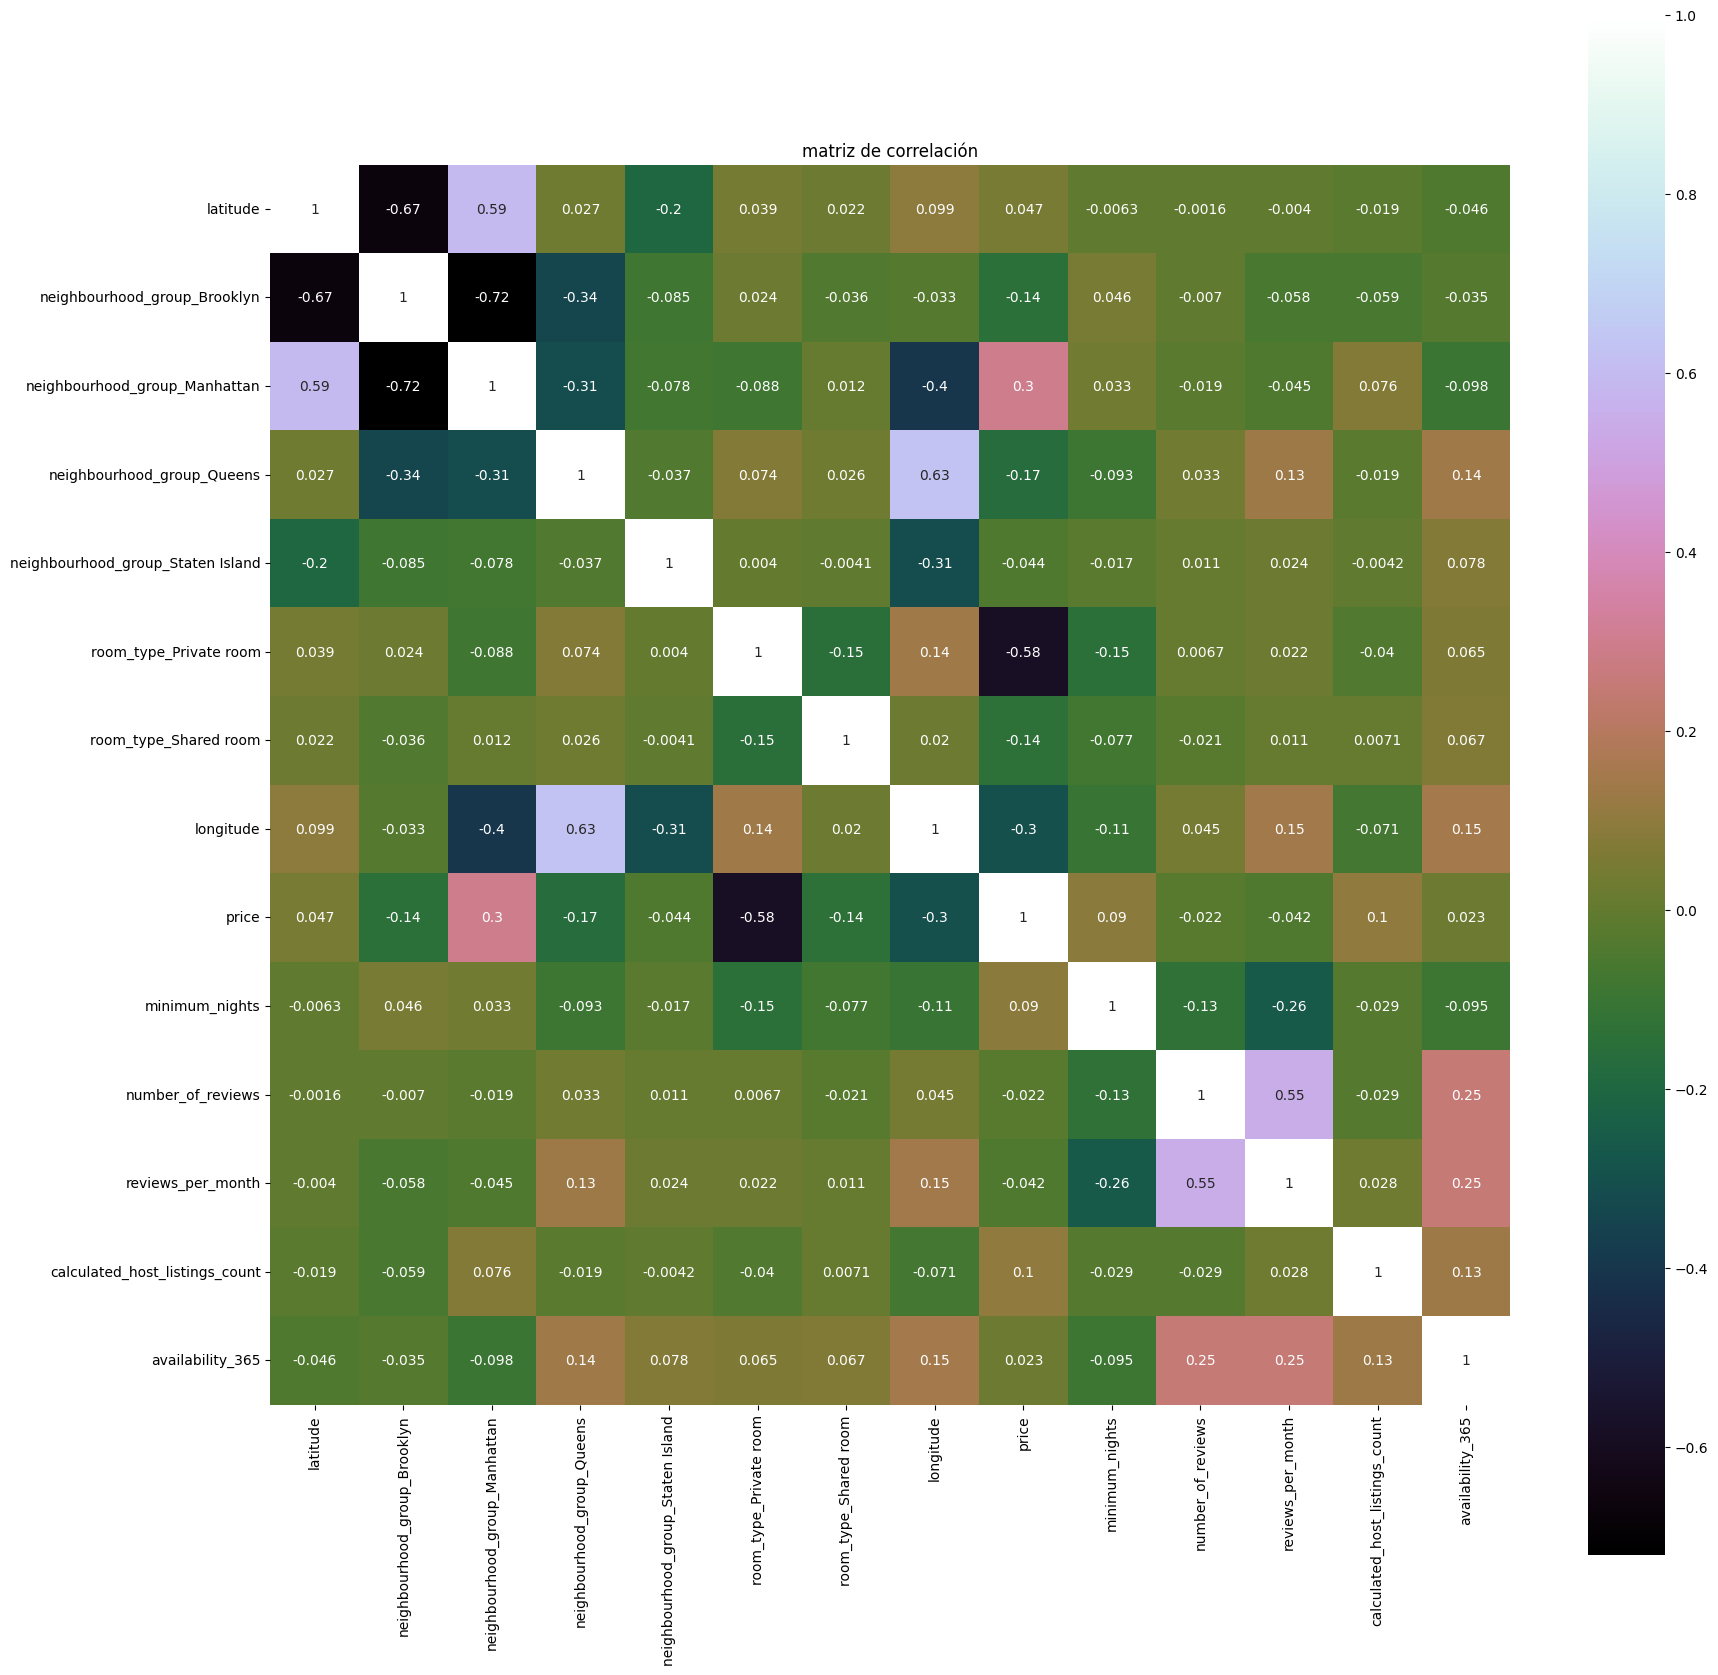

In [ ]:
# Resolver acá
import seaborn as sns
import matplotlib.pyplot as plt
#se genera la matriz
print(df_airbnb.columns)
variables = df_airbnbnum[['latitude','neighbourhood_group_Brooklyn','neighbourhood_group_Manhattan','neighbourhood_group_Queens','neighbourhood_group_Staten Island','room_type_Private room','room_type_Shared room','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
matriz=variables.corr()
plt.figure(figsize=(20,20))
sns.heatmap(matriz, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('matriz de correlación')


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de oferentes por 'neighbourhood_group'
proporcion_oferentes = df_airbnb['offer_group'].value_counts(normalize=True).reset_index()
proporcion_oferentes.columns = ['neighbourhood_group', 'proporcion']

#Calcular la proporción de oferentes por 'room_type'
proporcion_habitaciones = df_airbnb['room_type'].value_counts(normalize=True).reset_index()
proporcion_habitaciones.columns = ['room_type', 'proporcion']

# Mostrar proporciones de oferentes por 'neighbourhood_group'
print("Proporción de Oferentes por Neighbourhood Group:")
print(proporcion_oferentes)

# Mostrar proporciones de oferentes por 'room_type'
print("\nProporción de Oferentes por Tipo de Habitación:")
print(proporcion_habitaciones)

Proporción de Oferentes por Neighbourhood Group:
   neighbourhood_group  proporcion
0                14271    0.439486
1                12931    0.398220
2                 4153    0.127895
3                  819    0.025222
4                  298    0.009177

Proporción de Oferentes por Tipo de Habitación:
   room_type  proporcion
0          2    0.492455
1          1    0.484417
2          3    0.023128


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación?

Text(0, 0.5, 'Proporcion')

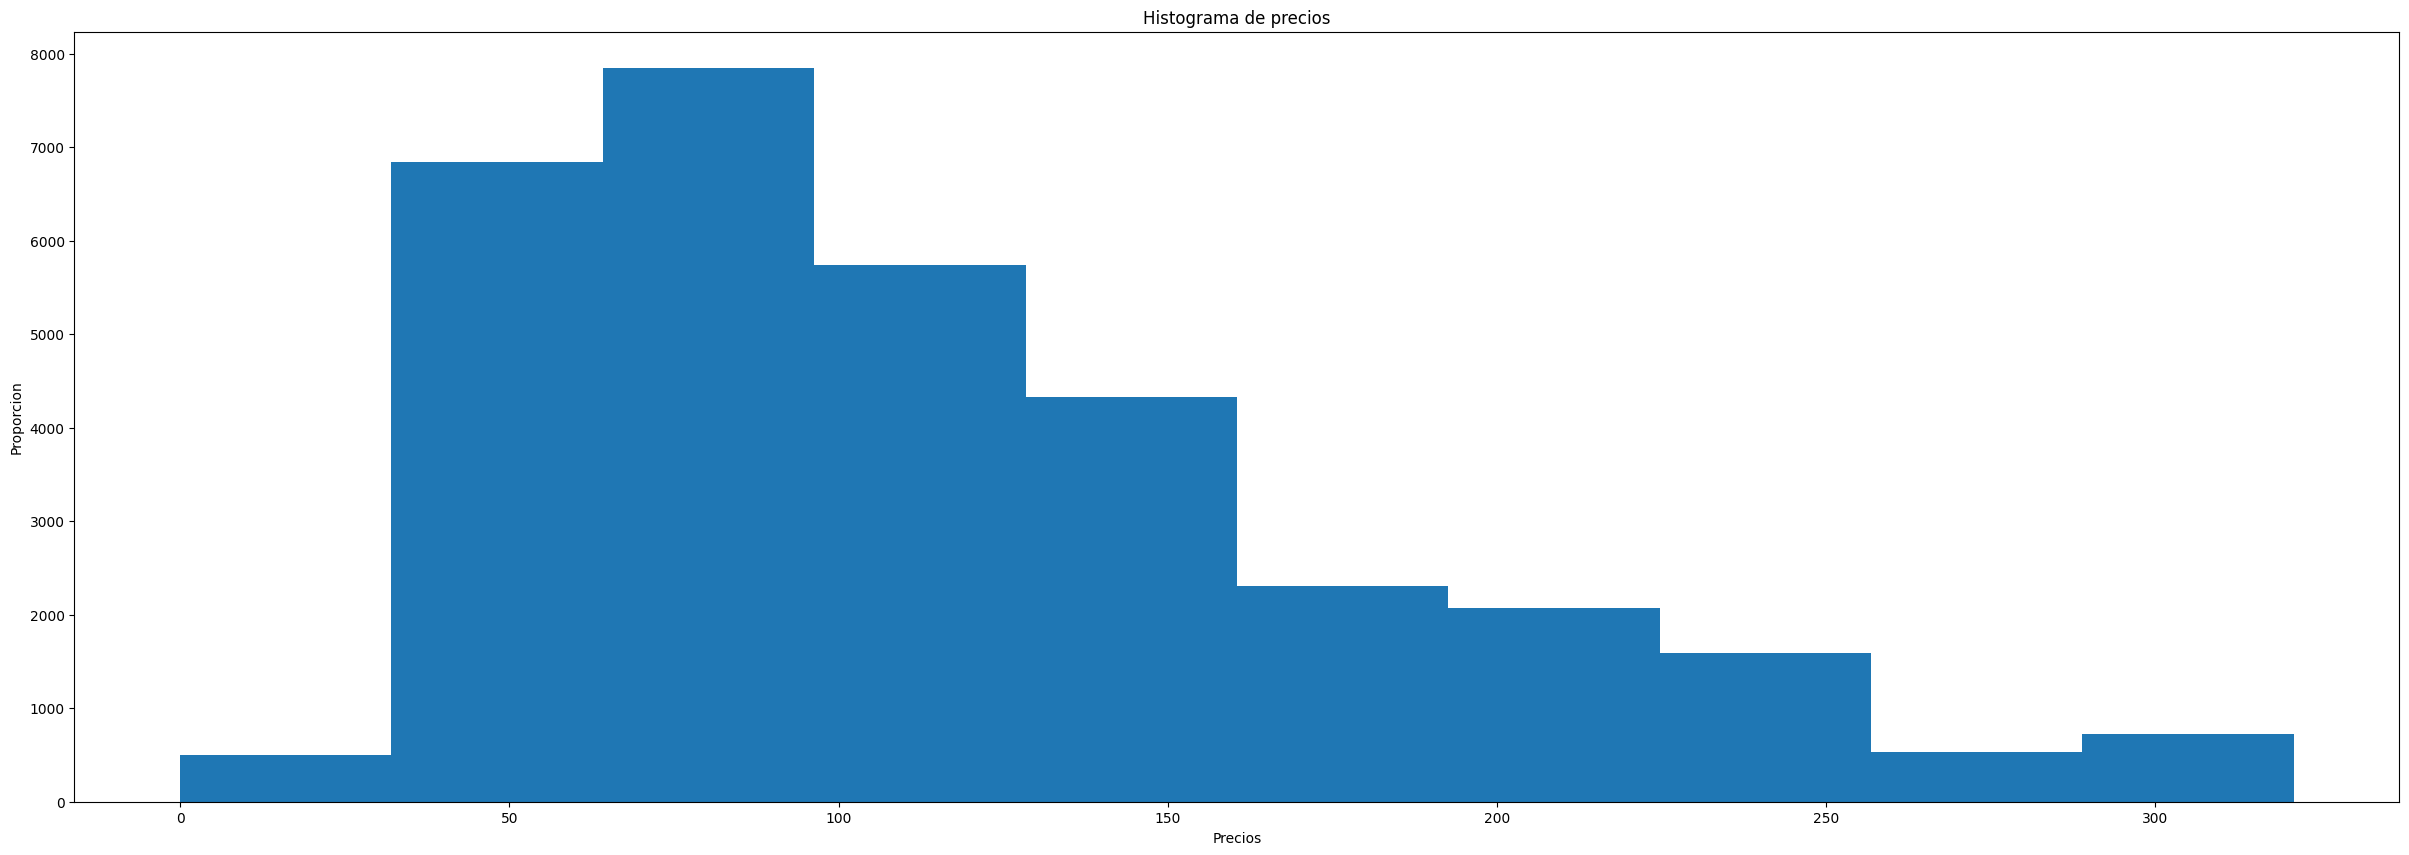

In [ ]:
# Resolver acá
plt.figure(figsize=(30,10))
plt.hist(df_airbnb['price'])
plt.title("Histograma de precios")
plt.xlabel("Precios")
plt.ylabel("Proporcion")

In [ ]:
#maximos, minimos y promedio

print("maximo: "+str(df_airbnb['price'].max()))
print("minimo: "+str(df_airbnb['price'].min()))
print("promedio: "+str(df_airbnb['price'].mean()))

maximo: 321.0
minimo: 0.0
promedio: 117.23737373737374


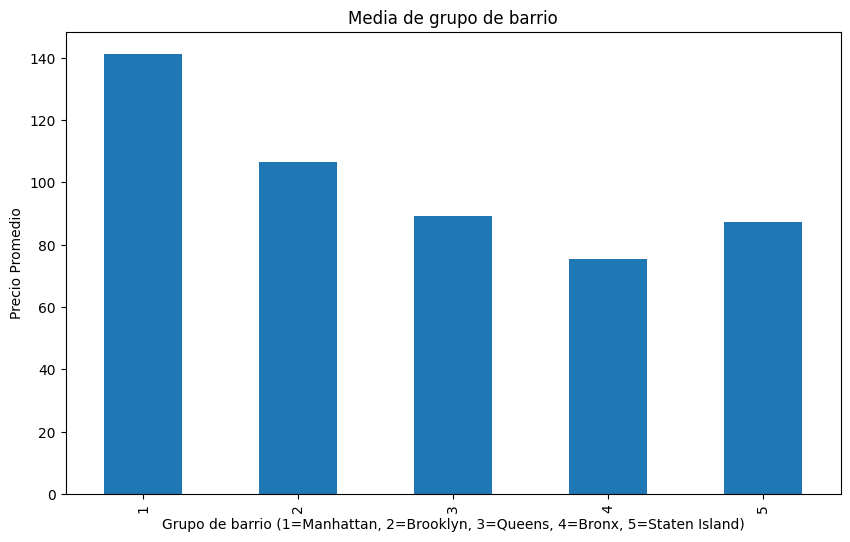

In [ ]:
#se generan dos variables diferentes utilizando la agrupación del precio en las dos variables deseadas, despues se calcula el promedio en el mismo código
barrio=df_airbnb.groupby('neighbourhood_group')['price'].mean()

habitacion=df_airbnb.groupby('room_type')['price'].mean()

#Grafico de los barrios
plt.figure(figsize=(10, 6))
barrio.plot(kind='bar')
plt.title('Media de grupo de barrio')
plt.ylabel('Precio Promedio')
plt.xlabel('Grupo de barrio (1=Manhattan, 2=Brooklyn, 3=Queens, 4=Bronx, 5=Staten Island)')
plt.show()

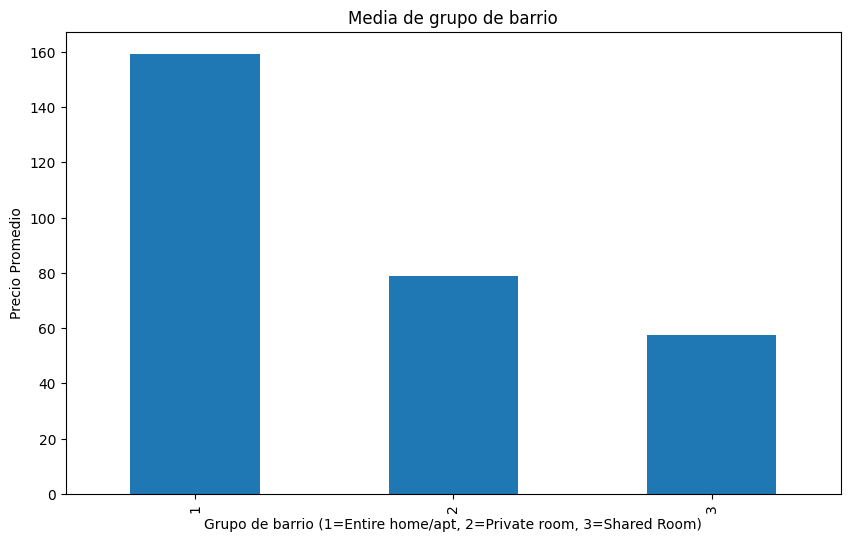

In [ ]:
#Grafico de las habitaciones
#Grafico de los barrios
plt.figure(figsize=(10, 6))
habitacion.plot(kind='bar')
plt.title('Media de grupo de barrio')
plt.ylabel('Precio Promedio')
plt.xlabel('Grupo de barrio (1=Entire home/apt, 2=Private room, 3=Shared Room)')
plt.show()


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

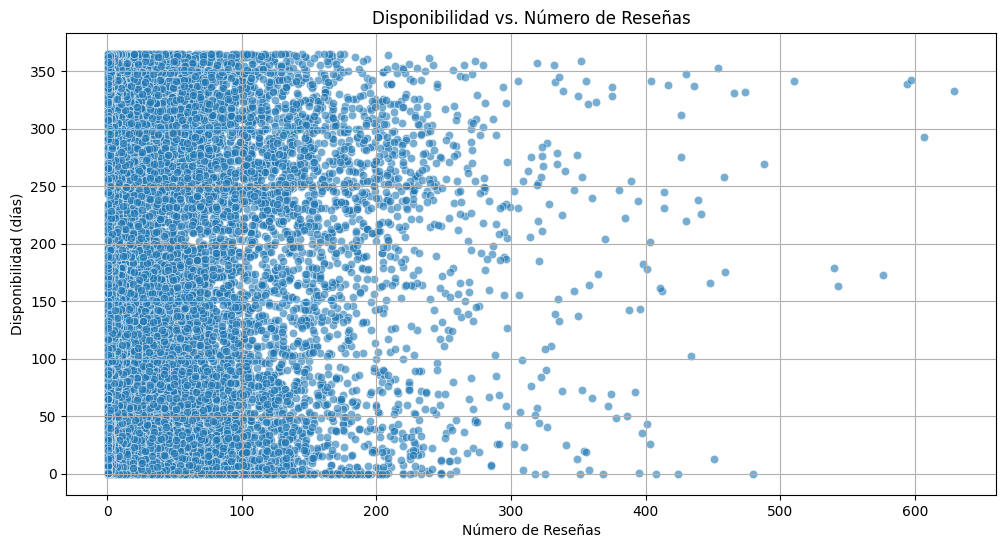

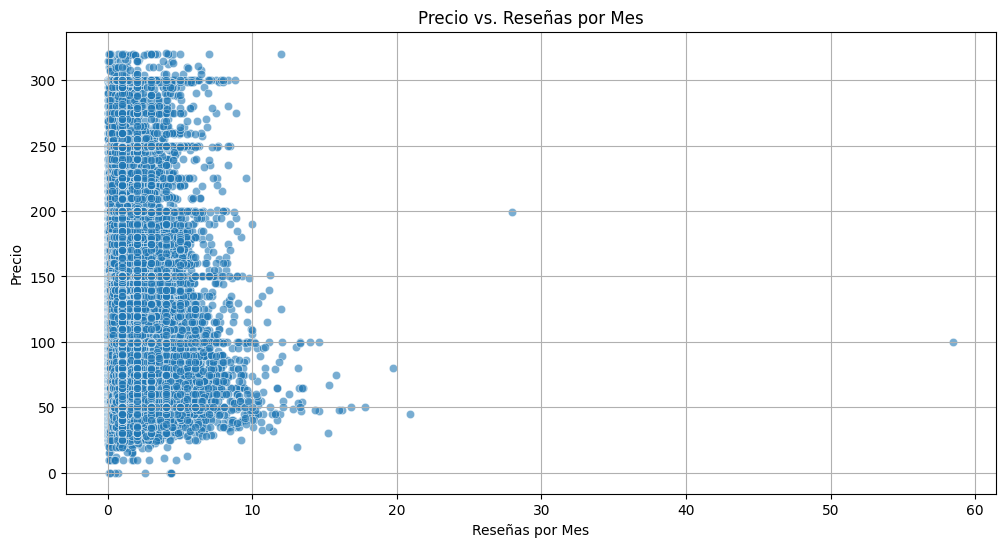

In [ ]:
# Resolver acá
import matplotlib.pyplot as plt
import seaborn as sns

# primer Scatter estudiando Disponibilidad (Availability 365) vs. Número de Reseñas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_airbnb, x='number_of_reviews', y='availability_365', alpha=0.6)
plt.title('Disponibilidad vs. Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Disponibilidad (días)')
plt.grid()
plt.show()

# segundo Scatter estudiando Precio vs. Reseñas por Mes (Reviews per Month)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_airbnb, x='reviews_per_month', y='price', alpha=0.6)
plt.title('Precio vs. Reseñas por Mes')
plt.xlabel('Reseñas por Mes')
plt.ylabel('Precio')
plt.grid()
plt.show()

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

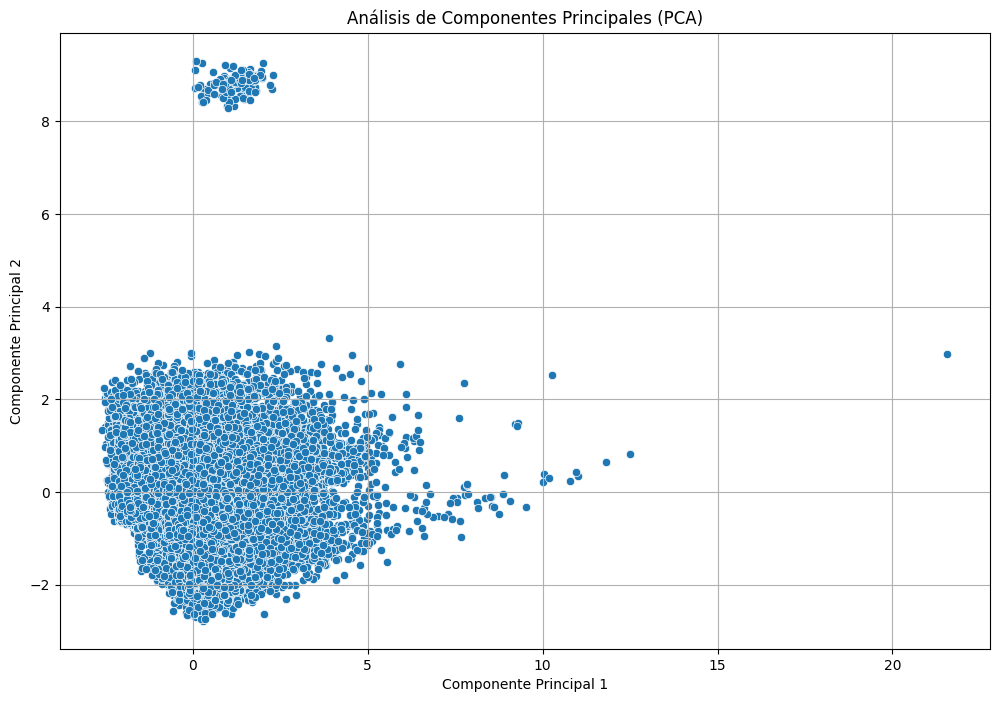

Varianza explicada por PC1: 0.27
Varianza explicada por PC2: 0.17
Varianza total explicada: 0.44
                                     PC1       PC2
price                          -0.105737  0.688602
minimum_nights                 -0.341093  0.169962
number_of_reviews               0.540162  0.143359
reviews_per_month               0.591845  0.073907
calculated_host_listings_count  0.056515  0.488055
availability_365                0.407629  0.217070
offer_group                    -0.247112  0.430824


In [ ]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Seleccionamos solo las variables numéricas de interés
variables_interes = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                     'calculated_host_listings_count', 'availability_365', 'offer_group']

# Filtramos el dataframe
df_pca = df_airbnb[variables_interes].copy()

# Normalizamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Aplicamos PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Creamos un DataFrame para los componentes principales
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Graficamos los resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pc_df, x='PC1', y='PC2')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

# Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {varianza_explicada[0]:.2f}")
print(f"Varianza explicada por PC2: {varianza_explicada[1]:.2f}")
print(f"Varianza total explicada: {varianza_explicada.sum():.2f}")

# Loadings
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_pca.columns)
print(loading_df)


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá utiliza la version correcta de las variables dummy
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
datosparte3=df_airbnbnum.drop(columns='price')
precios=df_airbnbnum['price']
datosparte3['unos']=np.ones(len(datosparte3))
x_train, x_test, y_train, y_test = train_test_split(datosparte3, precios, train_size=0.7, random_state=201)


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

Coeficiente de determinación (R2): 0.5005057415402637

Intercepto: -18551.04151683047

Pendiente: [-6.64014551e+01 -2.89440443e+02 -1.46515837e+00 -4.86120261e-02
 -7.92562109e-01  8.74391600e-02  6.86703369e-02  1.87517717e+00
  1.68517869e+01  8.81078493e+00 -3.66249076e+01 -7.59338702e+01
 -1.04556555e+02  1.87517717e+00  1.68517869e+01  8.81078493e+00
 -3.66249076e+01 -9.08715857e+00  0.00000000e+00]


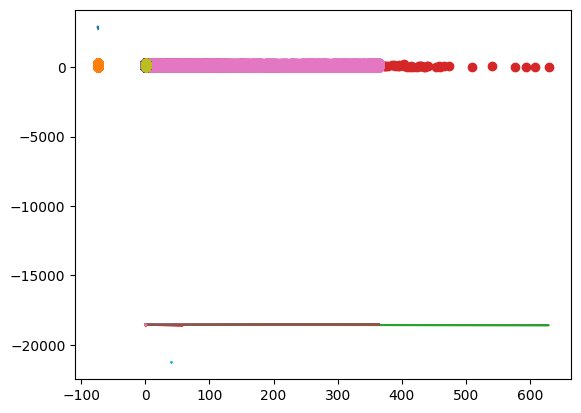

In [ ]:
# Resolver acá
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

model = LinearRegression().fit(x_train, y_train)

#R2 del modelo entrenado
r2 = model.score(x_train, y_train)

print('Coeficiente de determinación (R2):', r2)

#calculo de el intercept y la pendiente
intercept= model.intercept_
print("Intercepto:"+str(intercept))


pendiente = model.coef_
print('Pendiente:'+str(pendiente))


#grafico del modelo

plt.plot(x_train, y_train, 'o')
plt.plot(x_train, pendiente*x_train + intercept)

#

In [ ]:
#Predicciones

y_pred=model.predict(x_test)

r2nuevo=r2_score(y_test,y_pred)

print("R2 original: "+str(r2)+"R2 nuevo: "+str(r2nuevo))

mse=mean_squared_error(y_test,y_pred)
print("mse="+str(mse))

R2 original: 0.5005057415402637R2 nuevo: 0.4992684763881372
mse= 2134.273876944542
